In [203]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
## figure out how to do dendrograms - seaborn? pyplot? check STA663

In [2]:
# read in sample data from STA 561
data = np.genfromtxt('../STA 561/hw/hw6/data.csv', delimiter=',')

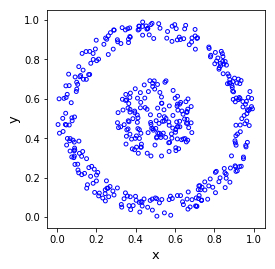

In [6]:
# check that plot of data matches hw
plt.scatter(data[:,0], data[:,1], marker='o', facecolors = 'none', edgecolors = 'b', s = 15)
plt.xlabel('x', size = 13)
plt.ylabel('y', size = 13)
plt.axis('square');

In [209]:
### Question 3b - Hierarchical Agglomerative Clustering
# single-linkage clustering: https://en.wikipedia.org/wiki/Single-linkage_clustering

def hac(k, data):
    n = data.shape[0]
    
    # start with each point in its own cluster
    clusters = np.arange(n)
    num_clusters = len(np.unique(clusters))
    
    while num_clusters > k:
        min_distances = np.zeros(n)
        min_points = np.zeros(n).astype('int')

        # for each point, find min distance to point not in cluster
        for i in range(n):
            point = data[i,]
            point_cluster = clusters[i]
            distances = np.linalg.norm(point - data, axis = 1)
            diff_cluster_points = np.where(clusters != point_cluster)[0]

            min_points[i] = diff_cluster_points[np.argmin(distances[diff_cluster_points])]
            min_distances[i] = distances[min_points[i]]

        # merge clusters of the two closest points
        point1_idx = np.argmin(min_distances)
        point1 = data[point1_idx,]
        point2_idx = min_points[point1_idx]
        point2 = data[point2_idx,]

        point2_cluster = clusters[point2_idx]
        clusters[np.where(clusters == point2_cluster)[0]] = clusters[point1_idx]

        # update number of clusters
        num_clusters = len(np.unique(clusters))
    
    return clusters

In [9]:
k = 2
clusters_hac = hac(k, data)

In [10]:
np.unique(clusters_hac)

array([ 16, 285])

In [11]:
g1 = np.where(clusters_hac == np.unique(clusters_hac)[0])[0]
g2 = np.where(clusters_hac == np.unique(clusters_hac)[1])[0]

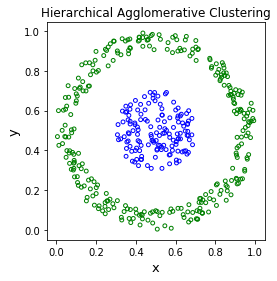

In [12]:
plt.scatter(data[g1,0], data[g1,1], marker='o', facecolors = 'none', edgecolors = 'b', s = 15)
plt.scatter(data[g2,0], data[g2,1], marker='o', facecolors = 'none', edgecolors = 'g', s = 15)
plt.xlabel('x', size = 13)
plt.ylabel('y', size = 13)
plt.axis('square')
plt.title('Hierarchical Agglomerative Clustering');

In [ ]:
## figure out LSH-link

In [54]:
point = np.array([3,2])

In [47]:
C = 5

In [18]:
np.r_[np.ones(3), np.zeros(C-3)]

array([1., 1., 1., 0., 0.])

In [55]:
def unary(x, C):
    nearest_x = int(np.round(x))
    return(np.r_[np.ones(nearest_x), np.zeros(C-nearest_x)])

In [56]:
# see if I can just vectorize the unary function?
res = np.concatenate(list(map(lambda x: unary(x, C), point)))
res

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [59]:
def lsh_hash(point, C):
    # see if I can just vectorize the unary function?
    res = np.concatenate(list(map(lambda x: unary(x, C), point)))
    return(res)

In [86]:
ex = lsh_hash(point, C)
ex

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [68]:
d = point.shape[0]

In [96]:
# offset numbers by 1 since it needs to be position in 0-indexed array
vals = np.arange(C*d)
vals

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
k = 5

In [97]:
# not sure if elements of I should be chosen with or without replacement
# should the elements of I be ordered sequentially?
I = np.random.choice(vals, k, replace = False)
I

array([7, 4, 9, 1, 2])

In [98]:
I = np.array([1, 3, 5, 6, 9]) - 1
I

array([0, 2, 4, 5, 8])

In [89]:
ex

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [99]:
ex[I]

array([1., 1., 0., 1., 0.])

In [161]:
# LSH prepares l distinct hash functions that differ from one another in the selection of I
l = 3

ex = lsh_hash(point, C)
print(ex, "\n")
hash_tables = defaultdict(list)
hash_tables_reversed = defaultdict(list)

for i in range(l):
    I = np.random.choice(vals, k, replace = False)
    hash_tables[convert_to_string(ex[I])].append(convert_to_string(point))
    hash_tables_reversed[convert_to_string(point)].append(convert_to_string(ex[I]))
    print(I)
    print(ex[I])

[1. 1. 1. 0. 0. 1. 1. 0. 0. 0.] 

[8 6 7 5 4]
[0. 1. 0. 1. 0.]
[6 1 5 8 2]
[1. 1. 1. 0. 1.]
[4 0 7 8 2]
[0. 1. 0. 0. 1.]


In [166]:
convert_to_array(hash_tables_reversed[convert_to_string(point)][0])

array([0., 1., 0., 1., 0.])

In [112]:
hash_tables['[0. 1. 1. 0. 1.]'].append(np.zeros(2))

In [121]:
test = ''.join(map(lambda x: str(int(x)), list(array)))
test

'11111'

In [158]:
def convert_to_string(array):
    return(' '.join(map(lambda x: str(float(x)), list(array))))

In [128]:
list(np.zeros(5))

[0.0, 0.0, 0.0, 0.0, 0.0]

In [134]:
np.fromstring(np.array_str(point), dtype=np.int, sep=' ')

array([], dtype=int64)

In [135]:
np.array_str(point)

'[3 2]'

In [147]:
np.fromstring(convert_to_string(np.array([3,2])), dtype=np.float64, sep=' ')

array([3., 2.])

In [ ]:
' '.join(list(np.ones(5)))

In [150]:
def convert_to_array(string):
    return(np.fromstring(string, dtype=np.float64, sep=' '))

In [159]:
convert_to_string(np.array([3,2]))

'3.0 2.0'

In [175]:
data[22,]

array([0.56821, 0.48248])

In [177]:
lsh_hash(data[22,], C)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [194]:
iris = datasets.load_iris().data
iris_head = iris[:5,].copy()

In [200]:
lsh_hash(iris_head[0], C)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [197]:
iris_head

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
################################################################################################################

In [225]:
n = iris_head.shape[0]
n
clusters = np.arange(n)

In [311]:
# LSH prepares l distinct hash functions that differ from one another in the selection of I
l = 3
hash_tables = defaultdict(set)
hash_tables_reversed = defaultdict(set)


for i in range(l):
    I = np.random.choice(vals, k, replace = False)
    print(I)

    for j in range(n):
        point = iris_head[j]
        ex = lsh_hash(point, C)

        hash_tables[tuple(ex[I])].add(tuple(point))
        hash_tables_reversed[tuple(point)].add(tuple(ex[I]))

[0 4 2 6 9]
[0 4 7 8 2]
[7 5 9 0 4]


In [224]:
hash_tables_reversed

defaultdict(set,
            {'4.6 3.1 1.5 0.2': {'1.0 0.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 1.0'},
             '4.7 3.2 1.3 0.2': {'1.0 0.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 1.0'},
             '4.9 3.0 1.4 0.2': {'1.0 0.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 1.0'},
             '5.0 3.6 1.4 0.2': {'1.0 0.0 1.0 1.0 1.0',
              '1.0 1.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 1.0'},
             '5.1 3.5 1.4 0.2': {'1.0 0.0 1.0 1.0 1.0',
              '1.0 1.0 1.0 1.0 0.0',
              '1.0 1.0 1.0 1.0 1.0'}})

In [259]:
np.where((iris_head == iris_head[:2,None]).all(-1))[1]

array([0, 1])

In [244]:
X = np.array([[4,  2],
              [9,  3],
              [8,  5],
              [3,  3],
              [5,  6]])

searched_values = np.array([[4, 2],
                            [3, 3],
                            [5, 6]])

np.where((X==searched_values[:,None]).all(-1))[1]

array([0, 3, 4])

In [252]:
searched_values

array([[4, 2],
       [3, 3],
       [5, 6]])

In [256]:
iris_head[:2,None]

array([[[5.1, 3.5, 1.4, 0.2]],

       [[4.9, 3. , 1.4, 0.2]]])

In [260]:
iris_head

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [269]:
test = np.random.choice(iris_head.shape[0], size = 2)

In [270]:
test

array([4, 1])

In [271]:
iris_head[test,:]

array([[5. , 3.6, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [272]:
iris_head

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [273]:
iris_head

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [274]:
from scipy.spatial.distance import pdist

In [289]:
np.min(pdist(iris_head, 'euclidean'))

0.1414213562373093

In [288]:
np.linalg.norm(iris_head[3] - iris_head[4])

0.6480740698407862

In [292]:
point.shape[0]

4

In [294]:
n, d = iris_head.shape

In [296]:
d

4

In [302]:
convert_to_string(lsh_hash(point, C)[I])

'1.0 1.0 1.0 1.0 0.0'

In [301]:
I

array([1, 0, 3, 4, 9])

In [312]:
hash_tables

defaultdict(set,
            {(1.0, 1.0, 0.0, 1.0, 1.0): {(4.6, 3.1, 1.5, 0.2),
              (4.7, 3.2, 1.3, 0.2),
              (4.9, 3.0, 1.4, 0.2),
              (5.0, 3.6, 1.4, 0.2),
              (5.1, 3.5, 1.4, 0.2)},
             (1.0, 1.0, 1.0, 0.0, 1.0): {(4.6, 3.1, 1.5, 0.2),
              (4.7, 3.2, 1.3, 0.2),
              (4.9, 3.0, 1.4, 0.2)},
             (1.0, 1.0, 1.0, 1.0, 0.0): {(4.6, 3.1, 1.5, 0.2),
              (4.7, 3.2, 1.3, 0.2),
              (4.9, 3.0, 1.4, 0.2),
              (5.0, 3.6, 1.4, 0.2),
              (5.1, 3.5, 1.4, 0.2)},
             (1.0, 1.0, 1.0, 1.0, 1.0): {(5.0, 3.6, 1.4, 0.2),
              (5.1, 3.5, 1.4, 0.2)}})

In [315]:
tuple(point) == point

array([ True,  True,  True,  True])

In [310]:
point

array([5. , 3.6, 1.4, 0.2])

In [318]:
point == tuple(point)

array([ True,  True,  True,  True])

In [338]:
b = set(map(tuple, iris_head))

In [339]:
a = hash_tables[(1.0, 1.0, 0.0, 1.0, 1.0)]

In [340]:
a.intersection(b)

{(4.6, 3.1, 1.5, 0.2),
 (4.7, 3.2, 1.3, 0.2),
 (4.9, 3.0, 1.4, 0.2),
 (5.0, 3.6, 1.4, 0.2),
 (5.1, 3.5, 1.4, 0.2)}

In [341]:
c = set()

In [343]:
not a.intersection(c)

True